<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification

In this notebook we're going to cover:
* Architecture of a classifcation model
* The input shapes and output shapes
* Types of classification problems: binary, multiclass, multilabel
* Creating custom data to view and fit
* Steps in modeling: creating a model, compiling a model, fitting a model, evaluating a model
* The power of non-linearity
* Evaluating classification models

# Creating and Viewing Classification Data

In [1]:
# load libraries
from sklearn.datasets import make_circles
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create classification data
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
# check data
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [4]:
# make dataframe
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


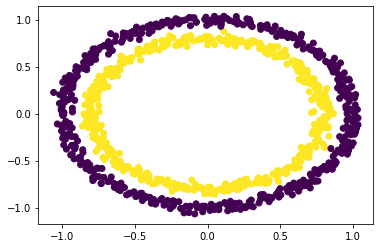

In [5]:
# plot data
plt.scatter(circles["X0"], circles["X1"], c=circles["label"])
plt.show()

# Input and Output Shapes

In [6]:
# check shapes
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# check samples
len(X), len(y)

(1000, 1000)

In [8]:
# see a sample
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Create Initial Model

In [9]:
# create model
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(None, 1))
])

model_0.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_0.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5012


In [10]:
# what if we train it for longer?
model_0.fit(tf.expand_dims(X, axis=-1), y, epochs=50, verbose=0)
model_0.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934351921081543, 0.5]

In [11]:
# what if we add more layers?
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(None, 1)),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=50, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936049461364746, 0.5]

# Improving The model

In [12]:
# classification requires sigmoid activation
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(X, y, epochs=50, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4750


[0.6954912543296814, 0.4749999940395355]

In [13]:
# further improve by adding layers and changing optimizer
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(X, y, epochs=50, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.6000


[0.6389328837394714, 0.6000000238418579]

# Non-Linearity

In [14]:
# create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

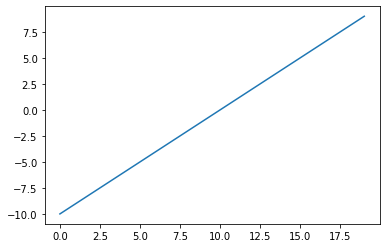

In [15]:
# visualize the tensor
plt.plot(A);

In [16]:
# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

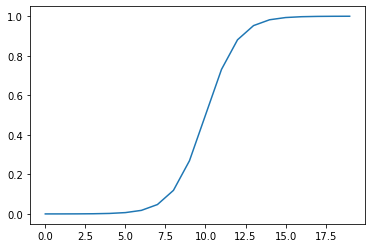

In [17]:
# visualize the sigmoid tensor
plt.plot(sigmoid(A));

In [18]:
# how about the relu function?
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

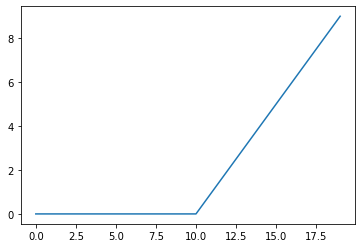

In [19]:
# visualize the relu function
plt.plot(relu(A));

# Tweaking the Learning Rate

In [20]:
# split data into train & test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [21]:
# recreate model but with higher learning rate and fewer epochs
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history_4 = model_4.fit(X_train, y_train, epochs=15, verbose=1) 

Epoch 1/15
25/25 [==============================] - 1s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/15
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/15
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/15
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/15
25/25 [

In [22]:
# evaluate
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.9100


[0.33486872911453247, 0.9100000262260437]

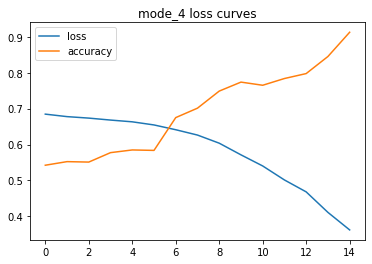

In [23]:
# plot
pd.DataFrame(history_4.history).plot()
plt.title("mode_4 loss curves");

# Using Callbacks to Optimize Learning Rate

In [24]:
# idea is to increase/decrease learning rate while training
tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch/20)
)

history_5 = model_5.fit(
    X_train, y_train, epochs=100, callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

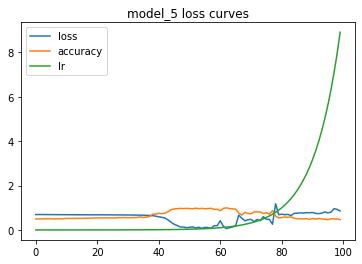

In [27]:
# plot
pd.DataFrame(history_5.history).plot()
plt.title("model_5 loss curves");

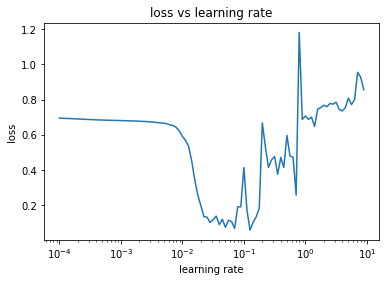

In [30]:
# find the learning rate where loss decreases the most
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("loss vs learning rate");

In [37]:
# use new learning rate
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history_6 = model_6.fit(X_train, y_train, epochs=15, verbose=1) 

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/15
25/25 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/15
25/25 [

In [38]:
# evaluate
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9850


[0.08774004876613617, 0.9850000143051147]

In [39]:
# what's the old eval
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.9100


[0.33486872911453247, 0.9100000262260437]